In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from pylab import *

<!-- -*- coding: utf-8 -*- -->
## Tutorial

This guide can help you start working with NetworkX.

[Networkx](https://networkx.github.io/documentation/networkx-1.10/overview.html)

### Creating a graph

Create an empty graph with no nodes and no edges.

See Algorithms for details on graph algorithms
supported.

# Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with
Matplotlib as well as an interface to use the open source Graphviz software
package are included.  These are part of the `networkx.drawing` module and will
be imported if possible.

First import Matplotlib’s plot interface (pylab works too)

It is a good habit to continually visualize what you are doing with networks.

By definition, a `Graph` is a collection of nodes (vertices) along with
identified pairs of nodes (called edges, links, etc).  In NetworkX, nodes can
be any hashable object e.g., a text string, an image, an XML object, another
Graph, a customized node object, etc.

# Nodes

The graph `G` can be grown in several ways.  NetworkX includes many graph
generator functions and facilities to read and write graphs in many formats.
To get started though we’ll look at simple manipulations.  You can add one node
at a time,

In [4]:
G = nx.Graph()

In [5]:
G.add_node(1)

add a list of nodes,

In [6]:
G.add_nodes_from([2, 3])

or add any iterable container of nodes. You can also add nodes along with node
attributes if your container yields 2-tuples (node, node_attribute_dict).
Node attributes are discussed further below.

In [7]:
H = nx.path_graph(10)
G.add_nodes_from(H)

Note that `G` now contains the nodes of `H` as nodes of `G`.
In contrast, you could use the graph `H` as a node in `G`.

In [8]:
G.add_node(H)

In [9]:
# to view all the nodes you just created
list(G.nodes)

[1, 2, 3, 0, 4, 5, 6, 7, 8, 9, <networkx.classes.graph.Graph at 0x16a1b5cd088>]

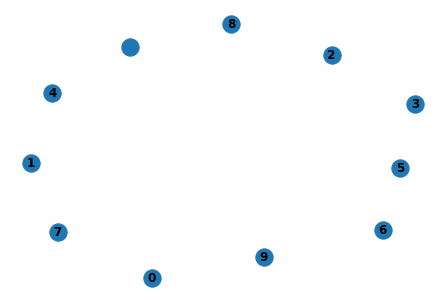

In [10]:
#to draw the network use nx.draw()
nx.draw(G, with_labels=True, font_weight='bold')


The graph `G` now contains `H` as a node.  This flexibility is very powerful as
it allows graphs of graphs, graphs of files, graphs of functions and much more.
It is worth thinking about how to structure your application so that the nodes
are useful entities.  Of course you can always use a unique identifier in `G`
and have a separate dictionary keyed by identifier to the node information if
you prefer.

# Edges

`G` can also be grown by adding one edge at a time,

In [11]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

by adding a list of edges,

In [12]:
G.add_edges_from([(1, 2), (1, 3)])

or by adding any ebunch of edges.  An *ebunch* is any iterable
container of edge-tuples.  An edge-tuple can be a 2-tuple of nodes or a 3-tuple
with 2 nodes followed by an edge attribute dictionary, e.g.,
`(2, 3, {'weight': 3.1415})`.  Edge attributes are discussed further below

In [13]:
G.add_edges_from(H.edges)

In [14]:
list(G.edges)

[(1, 2),
 (1, 3),
 (1, 0),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9)]

C:\Users\kenai\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


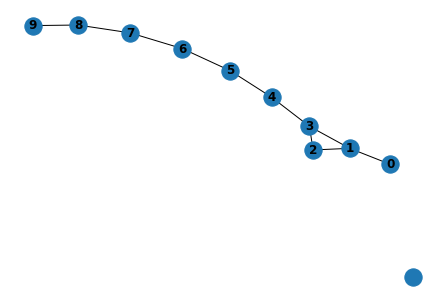

In [15]:
# Be careful when assessing network structure OR topology from visualization
# different visualiztion will provide different visual results
# need to combine visual information with statistical analysis to understand structure
nx.draw(G, with_labels=True, font_weight='bold')

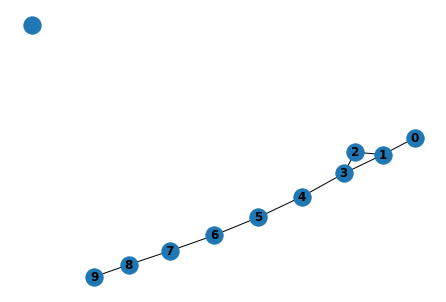

In [16]:
nx.draw(G, with_labels=True, font_weight='bold')

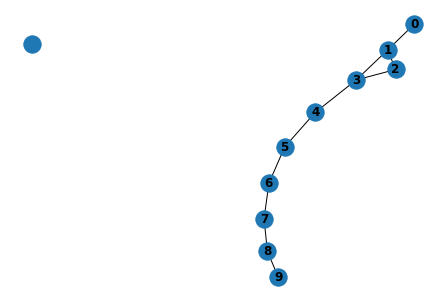

In [17]:
nx.draw(G, with_labels=True, font_weight='bold')

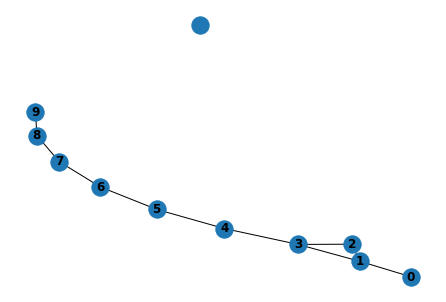

In [18]:
nx.draw(G, with_labels=True, font_weight='bold')

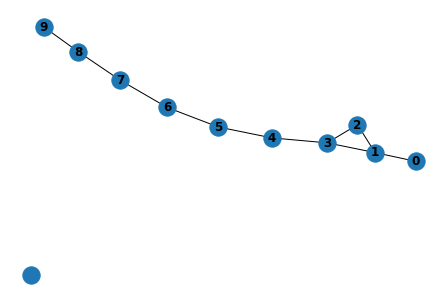

In [19]:
nx.draw(G, with_labels=True, font_weight='bold')

In [20]:
#There are no complaints when adding existing nodes or edges. For example, after removing all nodes and edges,
G.clear()

we add new nodes/edges and NetworkX quietly ignores any that are
already present.

In [21]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

At this stage the graph `G` consists of 8 nodes and 3 edges, as can be seen by:

In [22]:
G.number_of_nodes()


8

In [23]:
G.number_of_edges()

3

In [24]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [25]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

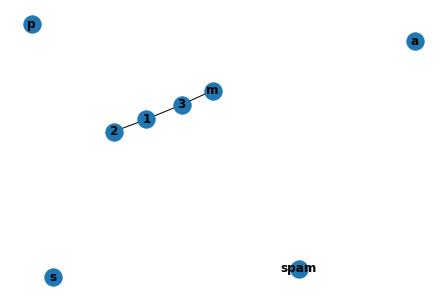

In [26]:
nx.draw(G, with_labels=True, font_weight='bold')

We can examine the nodes and edges. Four basic graph properties facilitate
reporting: `G.nodes`, `G.edges`, `G.adj` and `G.degree`.  These
are set-like views of the nodes, edges, neighbors (adjacencies), and degrees
of nodes in a graph. They offer a continually updated read-only view into
the graph structure. They are also dict-like in that you can look up node
and edge data attributes via the views and iterate with data attributes
using methods `.items()`, `.data('span')`.
If you want a specific container type instead of a view, you can specify one.
Here we use lists, though sets, dicts, tuples and other containers may be
better in other contexts.

In [27]:
# who is next to node 1
list(G.adj[1])  # or list(G.neighbors(1))

[2, 3]

In [28]:
# the number of nodes node 1 is connected to 
G.degree[1]  # the number of edges incident to 1

2

One can specify to report the edges and degree from a subset of all nodes
using an *nbunch*. An *nbunch* is any of: None (meaning all nodes), a node,
or an iterable container of nodes that is not itself a node in the graph.




In [29]:
G.edges([2, 'm'])


EdgeDataView([(2, 1), ('m', 3)])

In [30]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

One can remove nodes and edges from the graph in a similar fashion to adding.
Use methods
`Graph.remove_node()`,
`Graph.remove_nodes_from()`,
`Graph.remove_edge()`
and
`Graph.remove_edges_from()`, e.g.

In [31]:
G.remove_node(2)

In [32]:
G.remove_nodes_from("spam")

In [33]:
list(G.nodes)


[1, 3, 'spam']

In [34]:
G.remove_edge(1, 3)

When creating a graph structure by instantiating one of the graph
classes you can specify data in several formats.

In [35]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [36]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)

# What to use as nodes and edges

You might notice that nodes and edges are not specified as NetworkX
objects.  This leaves you free to use meaningful items as nodes and
edges. The most common choices are numbers or strings, but a node can
be any hashable object (except `None`), and an edge can be associated
with any object `x` using `G.add_edge(n1, n2, object=x)`.

As an example, `n1` and `n2` could be protein objects from the RCSB Protein
Data Bank, and `x` could refer to an XML record of publications detailing
experimental observations of their interaction.

Useful, but can lead to unexpected surprises unless one is familiar with Python.
If in doubt, consider using `convert_node_labels_to_integers()` to obtain
a more traditional graph with integer labels.

# Accessing edges and neighbors

In addition to the views `Graph.edges()`, and `Graph.adj()`,
access to edges and neighbors is possible using subscript notation.

In [37]:
G[1]  # same as G.adj[1]


AtlasView({2: {}})

In [38]:
G[1][2]

{}

In [39]:
G.edges[1, 2]

{}

You can get/set the attributes of an edge using subscript notation
if the edge already exists.

In [40]:
# adding an edge
G.add_edge(1, 3)

#adding an attribute to edges
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"

In [41]:
list(G.edges)

[(1, 2), (1, 3)]

In [48]:
color=nx.get_edge_attributes(G,'color')
color[(1,2)]

'red'

In [49]:
color[(1,3)]

'blue'

Fast examination of all (node, adjacency) pairs is achieved using
`G.adjacency()`, or `G.adj.items()`.
Note that for undirected graphs, adjacency iteration sees each edge twice.

In [51]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


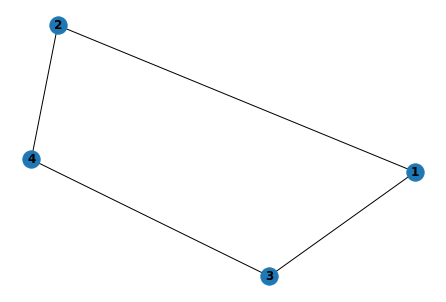

In [52]:
nx.draw(FG, with_labels=True, font_weight='bold')

Convenient access to all edges is achieved with the edges property.

In [53]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


# Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like,
can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated
attribute dictionary (the keys must be hashable).  By default these are empty,
but attributes can be added or changed using `add_edge`, `add_node` or direct
manipulation of the attribute dictionaries named `G.graph`, `G.nodes`, and
`G.edges` for a graph `G`.

## Graph attributes

Assign graph attributes when creating a new graph

In [54]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Or you can modify attributes later

In [55]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

# Node attributes

Add node attributes using `add_node()`, `add_nodes_from()`, or `G.nodes`

In [56]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [57]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [58]:
G.nodes

NodeView((1, 3))

Note that adding a node to `G.nodes` does not add it to the graph, use
`G.add_node()` to add new nodes. Similarly for edges.

# Edge Attributes

Add/change edge attributes using `add_edge()`, `add_edges_from()`,
or subscript notation.

In [59]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

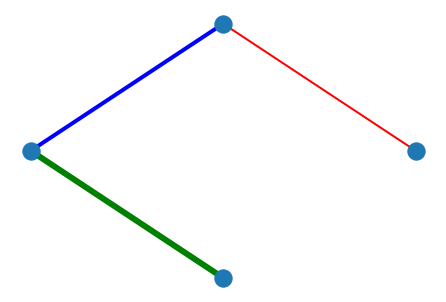

In [61]:
G = nx.Graph()
G.add_edge(1,2,color='r',weight=2)
G.add_edge(2,3,color='b',weight=4)
G.add_edge(3,4,color='g',weight=6)

pos = nx.circular_layout(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, edges=edges, edge_color=colors, width=weights)

In [62]:
G.edges

EdgeView([(1, 2), (2, 3), (3, 4)])

The special attribute `weight` should be numeric as it is used by
algorithms requiring weighted edges.

 Directed graphs

The `DiGraph` class provides additional properties specific to
directed edges, e.g.,
`DiGraph.out_edges()`, `DiGraph.in_degree()`,
`DiGraph.predecessors()`, `DiGraph.successors()` etc.
To allow algorithms to work with both classes easily, the directed versions of
`neighbors()` is equivalent to `successors()` while `degree` reports
the sum of `in_degree` and `out_degree` even though that may feel
inconsistent at times.

In [63]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')


0.5

In [64]:
DG.degree(1, weight='weight')
list(DG.successors(1))
list(DG.neighbors(1))

[2]

C:\Users\kenai\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


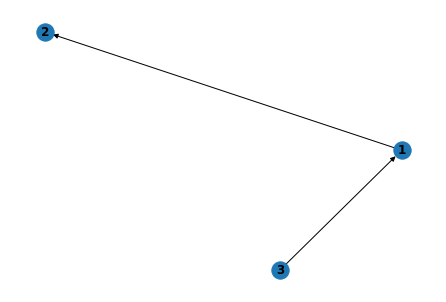

In [65]:
nx.draw(DG, with_labels=True, font_weight='bold')

Some algorithms work only for directed graphs and others are not well
defined for directed graphs.  Indeed the tendency to lump directed
and undirected graphs together is dangerous.  If you want to treat
a directed graph as undirected for some measurement you should probably
convert it using `Graph.to_undirected()` or with

In [66]:
H = nx.Graph(DG)  # convert G to undirected graph

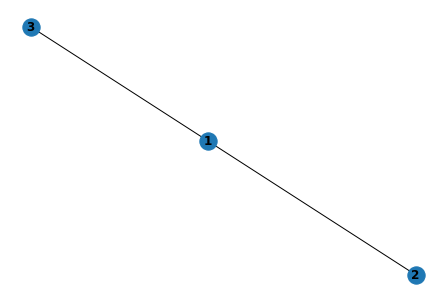

In [67]:
nx.draw(H, with_labels=True, font_weight='bold')

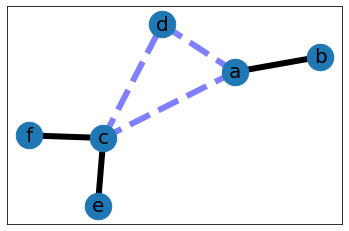

In [68]:
G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.show()

### Converting to and from other data formats

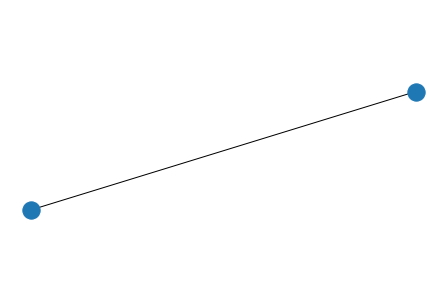

In [69]:
#dict of dictionaries to graph
d={0: {1: 1}}
G=nx.Graph(d)
nx.draw(G)

C:\Users\kenai\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  after removing the cwd from sys.path.
C:\Users\kenai\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


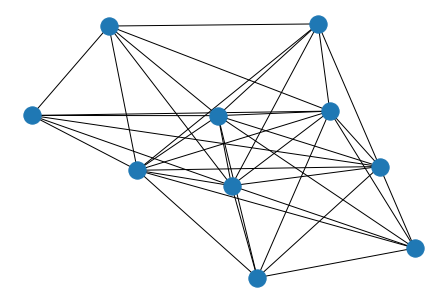

In [70]:
# Numpy to graph

import numpy
a = numpy.reshape(numpy.random.random_integers(0,1,size=100),(10,10))
G=nx.Graph(a)
nx.draw(G)


In [72]:
# pandas to graph
import pandas as pd

r = np.random.RandomState(seed=5)
ints = r.random_integers(1, 10, size=(3,2))
a = ['A', 'B', 'C']
b = ['D', 'A', 'E']
df = pd.DataFrame(ints, columns=['weight', 'cost'])
df[0] = a
df['b'] = b

C:\Users\kenai\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  """


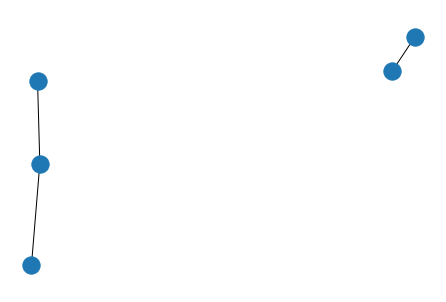

In [73]:
G=nx.from_pandas_edgelist(df, 0, 'b', edge_attr=True)
nx.draw(G)

# Multigraphs

NetworkX provides classes for graphs which allow multiple edges
between any pair of nodes.  The `MultiGraph` and
`MultiDiGraph`
classes allow you to add the same edge twice, possibly with different
edge data.  This can be powerful for some applications, but many
algorithms are not well defined on such graphs.
Where results are well defined,
e.g., `MultiGraph.degree()` we provide the function.  Otherwise you
should convert to a standard graph in a way that makes the measurement
well defined.

In [74]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)


[1, 2, 3]

# Graph generators and graph operations

In addition to constructing graphs node-by-node or edge-by-edge, they
can also be generated by

1. Applying classic graph operations, such as:

   ```
   subgraph(G, nbunch)      - induced subgraph view of G on nodes in nbunch
   union(G1,G2)             - graph union
   disjoint_union(G1,G2)    - graph union assuming all nodes are different
   cartesian_product(G1,G2) - return Cartesian product graph
   compose(G1,G2)           - combine graphs identifying nodes common to both
   complement(G)            - graph complement
   create_empty_copy(G)     - return an empty copy of the same graph class
   to_undirected(G) - return an undirected representation of G
   to_directed(G)   - return a directed representation of G
   ```

1. Using a call to one of the classic small graphs, e.g.,

In [75]:
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

1. Using a (constructive) generator for a classic graph, e.g.,

In [76]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

1. Using a stochastic graph generator, e.g.,

In [77]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

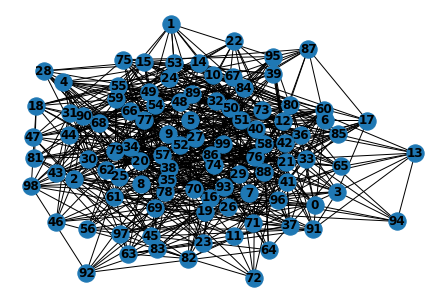

In [78]:
nx.draw(er, with_labels=True, font_weight='bold')

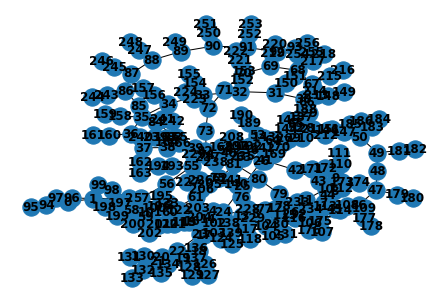

In [79]:
nx.draw(red, with_labels=True, font_weight='bold')

1. Reading a graph stored in a file using common graph formats,
   such as edge lists, adjacency lists, GML, GraphML, pickle, LEDA and others.

In [80]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

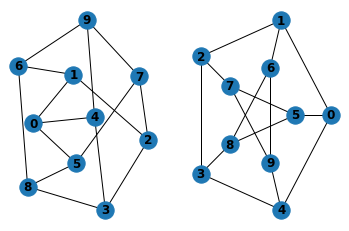

In [83]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

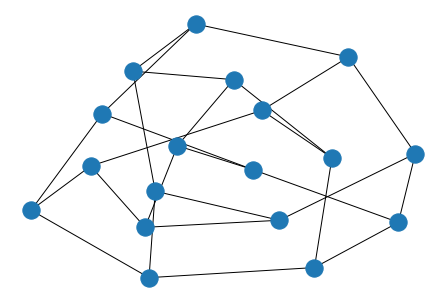

In [84]:
g=nx.pappus_graph()
nx.draw(g)

when drawing to an interactive display.  Note that you may need to issue a
Matplotlib

command if you are not using matplotlib in interactive mode (see
[Matplotlib FAQ](http://matplotlib.org/faq/installing_faq.html#matplotlib-compiled-fine-but-nothing-shows-up-when-i-use-it)
).

In [85]:
%matplotlib inline

In [86]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}

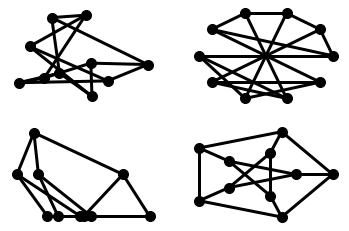

In [87]:
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

You can find additional options via `draw_networkx()` and
layouts via `layout`.
You can use multiple shells with `draw_shell()`.

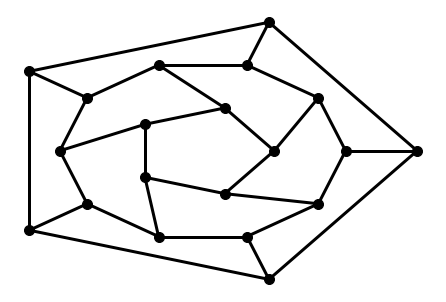

In [88]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

To save drawings to a file, use, for example

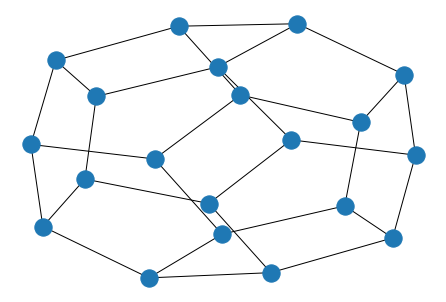

In [89]:
nx.draw(G)
plt.savefig("path.png")

writes to the file `path.png` in the local directory. If Graphviz and
PyGraphviz or pydot, are available on your system, you can also use
`nx_agraph.graphviz_layout(G)` or `nx_pydot.graphviz_layout(G)` to get the
node positions, or write the graph in dot format for further processing.

from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')

## Karate club

Example. If you can't get it right on this network, then go home.

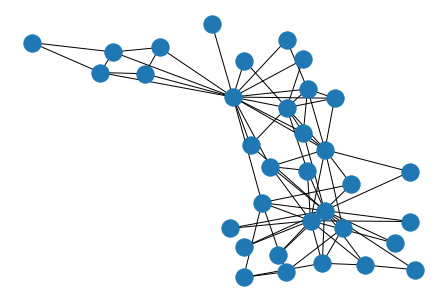

In [90]:
#https://networkkarate.tumblr.com/ if you use this network in your talk you get the trophy
nx.draw(nx.karate_club_graph())

In [111]:
g = nx.karate_club_graph()

In [92]:
g.name

"Zachary's Karate Club"

In [93]:
g.number_of_nodes()

34

In [94]:
g.number_of_edges()

78

In [95]:
#total possible connections
# any nodes possible degree is k-1
34*33/2

561.0

In [96]:
#density of g
78/(34*33/2)

0.13903743315508021

In [97]:
nx.density(g)

0.13903743315508021

In [98]:
list(nx.connected_components(g))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}]

In [99]:
g.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [100]:
g.nodes[0]

{'club': 'Mr. Hi'}

In [101]:
g.nodes(data = 'club')

NodeDataView({0: 'Mr. Hi', 1: 'Mr. Hi', 2: 'Mr. Hi', 3: 'Mr. Hi', 4: 'Mr. Hi', 5: 'Mr. Hi', 6: 'Mr. Hi', 7: 'Mr. Hi', 8: 'Mr. Hi', 9: 'Officer', 10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer', 16: 'Mr. Hi', 17: 'Mr. Hi', 18: 'Officer', 19: 'Mr. Hi', 20: 'Officer', 21: 'Mr. Hi', 22: 'Officer', 23: 'Officer', 24: 'Officer', 25: 'Officer', 26: 'Officer', 27: 'Officer', 28: 'Officer', 29: 'Officer', 30: 'Officer', 31: 'Officer', 32: 'Officer', 33: 'Officer'}, data='club')

In [102]:
g.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

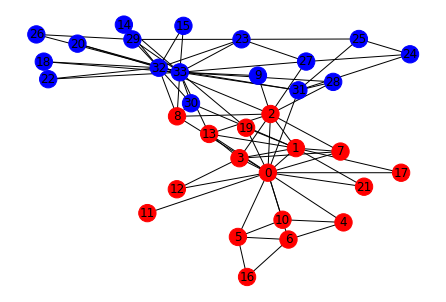

In [103]:
# use this to have data on the outside
# color nodes based on if they are connected to Mr. Hi
nx.draw(g, with_labels = True,
    node_color = ['r' if g.nodes[i]['club'] == "Mr. Hi" else 'b' for i in g.nodes])

In [ ]:
g = nx.karate_club_graph()

In [104]:
nx.degree_centrality(g) 


{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

In [105]:
nx.find_cliques(g)

<generator object find_cliques at 0x0000016A1D7FC2C8>

In [106]:
nx.enumerate_all_cliques(g)

<generator object enumerate_all_cliques at 0x0000016A1D7FC348>

In [107]:
nx.graph_clique_number(g)

5

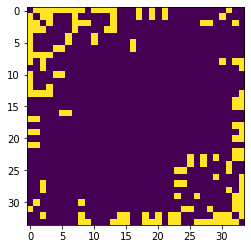

In [108]:
# can calculate eigenvector
imshow(nx.adjacency_matrix(g).todense())

C:\Users\kenai\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


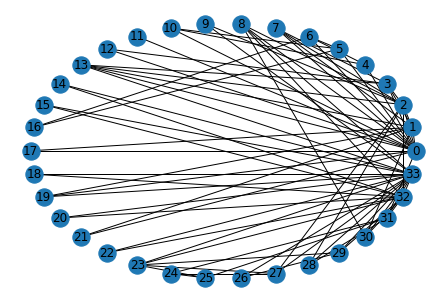

In [109]:
nx.draw_circular(g, with_labels = True)

### Create Networks by Hand

In [117]:
g.clear()

In [118]:
# how to construct network by hand
g.add_node('Kenneth')
g.add_nodes_from(['Julia', 'Cody', 'Taylor'])
g.add_edge('Ashlee', 'Mira')
g.add_edges_from([('Kenneth', 'Ashlee'), ('Cody', 'Taylor'), ('Kenneth', 'Julia'), ('Mira','Kenneth')])

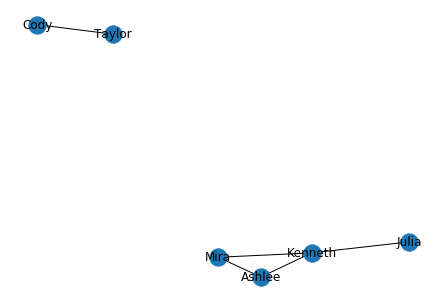

In [119]:
nx.draw(g, with_labels = True)

In [120]:
nx.write_edgelist(g, 'g.txt')

In [121]:
f= open('g.txt', 'r')
f.readlines()

['Kenneth Ashlee {}\n',
 'Kenneth Julia {}\n',
 'Kenneth Mira {}\n',
 'Cody Taylor {}\n',
 'Ashlee Mira {}\n']

In [122]:
# when using your own data the easiest way to create is just two cells
# each cell is a node, and if the nodes are in the same row they are connected
# this is the most basic format, sometimes called source to target
g=nx.read_edgelist('network-data.csv', delimiter = ',',
                  create_using = nx.DiGraph())

In [123]:
g.nodes

NodeView(('Ken', 'John', 'Jess', 'Josh', 'James', ' Jess', 'Jack', ' Joe', 'Joann'))

In [124]:
g.edges

OutEdgeView([('Ken', 'John'), ('Ken', ' Jess'), ('John', 'Jess'), ('Jess', 'Josh'), ('Josh', 'James'), ('Jack', ' Joe'), ('Joann', ' Jess')])

In [125]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 9
Number of edges: 7
Average in degree:   0.7778
Average out degree:   0.7778


In [126]:
density = nx.density(g)
print("Network density:", density)

Network density: 0.09722222222222222


### Networks come in many shapes

Depends on data

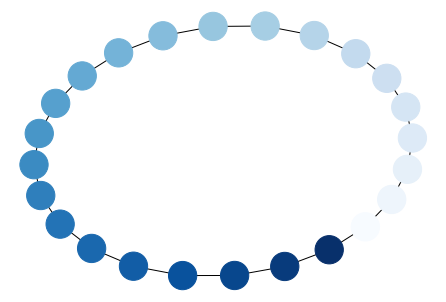

In [127]:
G = nx.cycle_graph(24)
pos = nx.spring_layout(G, iterations=200)
nx.draw(G, pos, node_color=range(24), node_size=800, cmap=plt.cm.Blues)
plt.show()

In [128]:
# What kind of data would make sense here?
# edge, graph, node attributes?

C:\Users\kenai\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\kenai\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


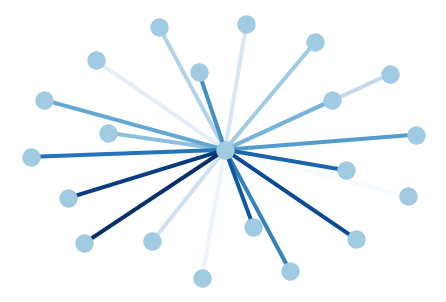

In [129]:
G = nx.star_graph(20)
pos = nx.spring_layout(G)
colors = range(20)
nx.draw(G, pos, node_color='#A0CBE2', edge_color=colors,
        width=4, edge_cmap=plt.cm.Blues, with_labels=False)
plt.show()

In [130]:
#what kind of data would make sense here?

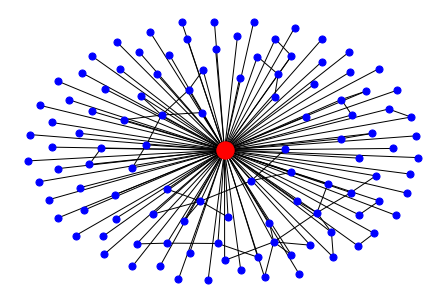

In [131]:
from operator import itemgetter

if __name__ == '__main__':
    # Create a BA model graph
    n = 1000
    m = 2
    G = nx.generators.barabasi_albert_graph(n, m)
    # find node with largest degree
    node_and_degree = G.degree()
    (largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
    # Create ego graph of main hub
    hub_ego = nx.ego_graph(G, largest_hub)
    # Draw graph
    pos = nx.spring_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
    plt.show()

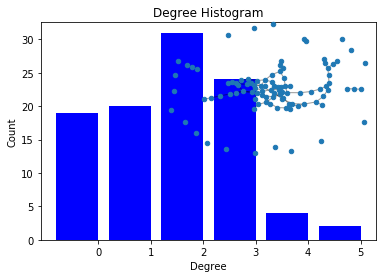

In [132]:
import collections

G = nx.gnp_random_graph(100, 0.02)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

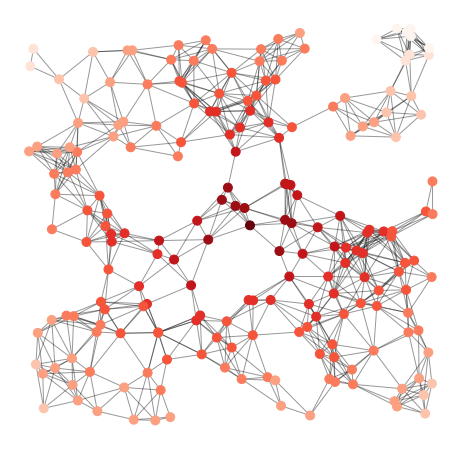

In [133]:
G = nx.random_geometric_graph(200, 0.125)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

C:\Users\kenai\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


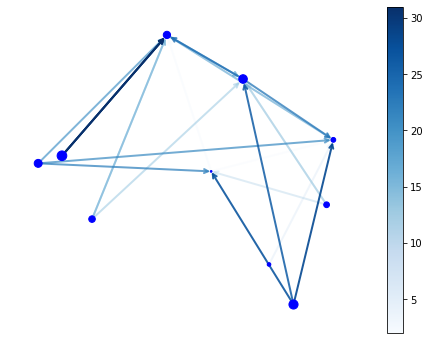

In [134]:
figure(num=None, figsize=(8, 6))
G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()